In [97]:
## This cell has functions and state instantiations

from random import *
import numpy as nm
from scipy.stats import truncnorm
from operator import add

seed (None)

## Global variables
global N, NUM_OF_ITERATION
global STATE0, STATE1, STATE2, STATE3, STATE4, STATE5, STATE6
global BASE, OPT
global PDM, GREEDY, GENERIC
global iCache, dCache
global PROB

global PDM_OPT, GREEDY_OPT, GENERIC_OPT
global OPT_LIST
global METHOD



## Instantiating global variables
## N is the total number of cycles the process runs for
N = 1000000

## Number of iterations for the complete run
## 10000 takes around 2 min to run
NUMBER_OF_ITERATION = 10000  

## BASE list has all the base cycle values that were generated
## OPT list has the optimized values for that cycle post optimization
BASE = []
OPT = []

## Probability gives the transition ad cycle probability of each state
PROB = {'S0': 0.14, 'S1': 0.06, 'S2': 0.14, 'S3': 0.38, 'S4': 0.01, 'S5': 0.02, 'S6': 0.25}

STATE0 = {'meanCycle': PROB['S0']*N , 'stdDev': PROB['S0']*N*0.05 , 'min': PROB['S0']*N-PROB['S0']*N*0.05,\
          'max': PROB['S0']*N+PROB['S0']*N*0.05, 'base': BASE, 'opt': OPT}
STATE1 = {'meanCycle': PROB['S1']*N , 'stdDev': PROB['S1']*N*0.05 , 'min': PROB['S1']*N-PROB['S1']*N*0.05,\
          'max': PROB['S1']*N+PROB['S1']*N*0.05, 'base': BASE, 'opt': OPT}
STATE2 = {'meanCycle': PROB['S2']*N , 'stdDev': PROB['S2']*N*0.05 , 'min': PROB['S2']*N-PROB['S2']*N*0.05,\
          'max': PROB['S2']*N+PROB['S2']*N*0.05, 'base': BASE, 'opt': OPT}
STATE3 = {'meanCycle': PROB['S3']*N , 'stdDev': PROB['S3']*N*0.05 , 'min': PROB['S3']*N-PROB['S3']*N*0.05,\
          'max': PROB['S3']*N+PROB['S3']*N*0.05, 'base': BASE, 'opt': OPT}
STATE4 = {'meanCycle': PROB['S4']*N , 'stdDev': PROB['S4']*N*0.05 , 'min': PROB['S4']*N-PROB['S4']*N*0.05,\
          'max': PROB['S4']*N+PROB['S4']*N*0.05, 'base': BASE, 'opt': OPT}
STATE5 = {'meanCycle': PROB['S5']*N , 'stdDev': PROB['S5']*N*0.05 , 'min': PROB['S5']*N-PROB['S5']*N*0.05,\
          'max': PROB['S5']*N+PROB['S5']*N*0.05, 'base': BASE, 'opt': OPT}
STATE6 = {'meanCycle': PROB['S6']*N , 'stdDev': PROB['S6']*N*0.05 , 'min': PROB['S6']*N-PROB['S6']*N*0.05,\
          'max': PROB['S6']*N+PROB['S6']*N*0.05, 'base': BASE, 'opt': OPT}

## name key added to print the name
PDM = {'name': 'PDM', 'freqSampling': 2000, 'lat': 500, 'stdDev': 20, 'quality': 0.8}
GREEDY = {'name': 'GREEDY', 'freqSampling': 4000, 'lat': 1500, 'stdDev': 100, 'quality': 0.9}
GENERIC = {'name': 'GENERIC', 'freqSampling': 20000, 'lat': 5000, 'stdDev': 500, 'quality': 1}

## CycleRatio ==> is the percentage of cycles that the technique uses from the total cycles
iCache = {'name': 'iCahche', 'lat': 250, 'stdDev': 10, 'quality': 0.2, 'cycleRatio': 0.6}
dCache = {'name': 'dCache', 'lat': 400, 'stdDev': 50, 'quality': 0.3, 'cycleRatio': 0.1}
ROB = {'name': 'ROB', 'lat': 300, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.1}
IQ = {'name': 'IQ', 'lat': 400, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.2}

## techList is the list containing all the techniques 
## it is fed into the getOptCycles to get the configuration time for the max of the techniques
techList = [iCache, dCache, ROB, IQ]

## Clearing the global opt lists
PDM_OPT = []
GREEDY_OPT = []
GENERIC_OPT = []

## Create OPT_LIST contains the speedup for all the variations of techniques
OPT_LIST = [PDM_OPT, GREEDY_OPT, GENERIC_OPT]

## Create a list of methods, do not create strings 'PDM' XX
METHOD = [PDM, GREEDY, GENERIC]

## This list is not need as we have encoded the techniques in 
## the getOptCycles using the getActiveTech function
#TECH = [iCache, dCache]



## ------------------------------------------------------------------------


def state_0():
    ##Mprint "State_0"
    ## Lets take that the mean values of cycles in state0 is 50000 and std Dev is 5000
    global STATE0, BASE, OPT
    
    #cycle = STATE0['meanCycle']
    #stdDev = STATE0['stdDev']
    
    ## Creating a dictionary of list to keep track of our base cycles and optimized cycles
    ## base and opt are the lists corressponding to base and optimized cycles
    #base = []
    #opt = []
    
    #state0 = {'BASE': base, 'OPT': opt}
    
    ## Creating a base cycle and appending it to the list base
    
    ## baseCycles for the state at the current execution time
    ## random number from the normal distribution with mean=STATE1['meanCycle']
    ## and stdDev = STATE1['stdDev']
    #baseCycles = round(nm.random.normal(STATE0['meanCycle'], STATE0['stdDev']))
    baseCycles = round(getTruncatedNormal(STATE0['meanCycle'], STATE0['stdDev'],\
                                         STATE0['min'], STATE0['max']))
    BASE.append(baseCycles)
    
    ## For the first iteration we need to start with time=0
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        ## startCycles for next iteration is the baseCycle from previous state
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    ## 
    #for i in range(len(BASE)):
        #print "BASE[%d] = %f" %(i, BASE[i])
    
    if random() <= 0.14:
        return state_0
    elif random() > 0.14 and random() <= 0.20:
        return state_1
    elif random() > 0.20 and random() <= 0.34:
        return state_2
    elif random() > 0.34 and random() <= 0.72:
        return state_3
    elif random() > 0.72 and random() <= 0.73:
        return state_4
    elif random() > 0.73 and random() <= 0.75:
        return state_5
    elif random() > 0.75:
        return state_6

def state_1():
    ##Mprint "State_1"
    
    ##
    global STATE1, BASE, OPT
    
    ## baseCycles for the state at the current execution time
    ## random number from the normal distribution with mean=STATE1['meanCycle']
    ## and stdDev = STATE1['stdDev']
    #baseCycles = round(nm.random.normal(STATE1['meanCycle'], STATE1['stdDev']))
    baseCycles = round(getTruncatedNormal(STATE1['meanCycle'], STATE1['stdDev'],\
                                         STATE1['min'], STATE1['max']))
    BASE.append(baseCycles)
    
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    #for i in range(len(BASE)):
        #print "BASE[%d]= %f" %(i, BASE[i])
        
    if random() <= 0.14:
        return state_0
    elif random() > 0.14 and random() <= 0.20:
        return state_1
    elif random() > 0.20 and random() <= 0.34:
        return state_2
    elif random() > 0.34 and random() <= 0.72:
        return state_3
    elif random() > 0.72 and random() <= 0.73:
        return state_4
    elif random() > 0.73 and random() <= 0.75:
        return state_5
    elif random() > 0.75:
        return state_6
    
def state_2():
    ##Mprint "State_2"
    
    ##
    global STATE1, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE2['meanCycle'], STATE2['stdDev'],\
                                         STATE2['min'], STATE2['max']))
    BASE.append(baseCycles)
    
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    if random() <= 0.14:
        return state_0
    elif random() > 0.14 and random() <= 0.20:
        return state_1
    elif random() > 0.20 and random() <= 0.34:
        return state_2
    elif random() > 0.34 and random() <= 0.72:
        return state_3
    elif random() > 0.72 and random() <= 0.73:
        return state_4
    elif random() > 0.73 and random() <= 0.75:
        return state_5
    elif random() > 0.75:
        return state_6

def state_3():
    ##Mprint "State_3"
    
    ##
    global STATE1, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE3['meanCycle'], STATE3['stdDev'],\
                                         STATE3['min'], STATE3['max']))
    BASE.append(baseCycles)
    
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    if random() <= 0.14:
        return state_0
    elif random() > 0.14 and random() <= 0.20:
        return state_1
    elif random() > 0.20 and random() <= 0.34:
        return state_2
    elif random() > 0.34 and random() <= 0.72:
        return state_3
    elif random() > 0.72 and random() <= 0.73:
        return state_4
    elif random() > 0.73 and random() <= 0.75:
        return state_5
    elif random() > 0.75:
        return state_6

def state_4():
    ##Mprint "State_4"
    
    ##
    global STATE1, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE4['meanCycle'], STATE4['stdDev'],\
                                         STATE4['min'], STATE4['max']))
    BASE.append(baseCycles)
    
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    if random() <= 0.14:
        return state_0
    elif random() > 0.14 and random() <= 0.20:
        return state_1
    elif random() > 0.20 and random() <= 0.34:
        return state_2
    elif random() > 0.34 and random() <= 0.72:
        return state_3
    elif random() > 0.72 and random() <= 0.73:
        return state_4
    elif random() > 0.73 and random() <= 0.75:
        return state_5
    elif random() > 0.75:
        return state_6
    
def state_5():
    ##Mprint "State_5"
    
    ##
    global STATE1, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE5['meanCycle'], STATE5['stdDev'],\
                                         STATE5['min'], STATE5['max']))
    BASE.append(baseCycles)
    
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    if random() <= 0.14:
        return state_0
    elif random() > 0.14 and random() <= 0.20:
        return state_1
    elif random() > 0.20 and random() <= 0.34:
        return state_2
    elif random() > 0.34 and random() <= 0.72:
        return state_3
    elif random() > 0.72 and random() <= 0.73:
        return state_4
    elif random() > 0.73 and random() <= 0.75:
        return state_5
    elif random() > 0.75:
        return state_6
    
def state_6():
    ##Mprint "State_6"
    
    ##
    global STATE1, BASE, OPT
    
    baseCycles = round(getTruncatedNormal(STATE6['meanCycle'], STATE6['stdDev'],\
                                         STATE6['min'], STATE6['max']))
    BASE.append(baseCycles)
    
    if (len(BASE) == 1):
        optStateCycles = getOptCycles(baseCycles, 0, PDM, techList, getActiveTech(10))
    else:
        optStateCycles = getOptCycles(baseCycles, getTotalCycles(BASE, len(BASE)-1), PDM, techList, getActiveTech(10))
    
    OPT.append(optStateCycles)
    
    if random() <= 0.14:
        return state_0
    elif random() > 0.14 and random() <= 0.20:
        return state_1
    elif random() > 0.20 and random() <= 0.34:
        return state_2
    elif random() > 0.34 and random() <= 0.72:
        return state_3
    elif random() > 0.72 and random() <= 0.73:
        return state_4
    elif random() > 0.73 and random() <= 0.75:
        return state_5
    elif random() > 0.75:
        return state_6


## Other functions
## get the techniques that are active for a given simulation
def getActiveTech(x):
    if (x == 0):
        return (0, 0, 0, 0)
    elif (x==1):
        return (0, 0, 0, 1)
    elif (x==2):
        return (0, 0, 1, 0)
    elif (x==3):
        return (0, 0, 1, 1)
    elif (x==4):
        return (0, 1, 0, 0)
    elif (x==5):
        return (0, 1, 0, 1)
    elif (x==6):
        return (0, 1, 1, 0)
    elif (x==7):
        return (0, 1, 1, 1)
    elif (x==8):
        return (1, 0, 0, 0)
    elif (x==9):
        return (1, 0, 0, 1)
    elif (x==10):
        return (1, 0, 1, 0)
    elif (x==11):
        return (1, 0, 1, 1)
    elif (x==12):
        return (1, 1, 0, 0)
    elif (x==13):
        return (1, 1, 0, 1)
    elif (x==14):
        return (1, 1, 1, 0)
    elif (x==15):
        return (1, 1, 1, 1)

###############################################

## sum() => internal function can also be used
## Usage sum(list)
def getTotalCycles(list1, index):
    tot = 0
    for i in range(index):
        tot = tot + list1[i]
    return tot

###############################################

## getOptCycles takes in input basecycle, time at which the state started,
## method and technique applied and returns the optimized time for that state, that method 
## and technique

## baseCycles => is generated randomly based on mean and variance for a state
## startCycles => is the time at which the previous state finished. Start of this state in globale
## time
## method => method, PDM, GREEDY, GENERIC
## method['lat'] => gives the latency time for the method
## techList => technique applied, iCache, dCache, ROB etc. Used to get config time for 
##          all the techniques and max will be used for process
## activeTech ==> is the tuple with the active techniques 

def getOptCycles(baseCycles, startCycles, method, techList, activeTech):
    #print "method= %s\n%s['freqSampling'] = %d" %(method, method, method['freqSampling'])
    #print "Type of Method = %s" %(type(method))
    samplingRate = method['freqSampling']
    
    ## samplingTime is the time in the state where the technique will sample for optimisation
    ## If the startCyles is 0 => Starting the simulation
    ## startCycles is divisible by sampling rate => We discussed to go on to the next 
    ## sampling cycle
    if (startCycles % samplingRate == 0 or startCycles == 0):
        samplingTime = samplingRate
    elif (startCycles % samplingRate != 0):
        ## Since we know the starting time, we divide it by samplingRate to see how much 
        ## it is above the samplingRate. Now we subtract it from the samplingRate to get 
        ## how further down will the next sampling be done.
        ## We multiply 2*samplingRate since the program will take at least freqSampling
        ## to optimize.
        #samplingTime = startCycles + (samplingRate - nm.remainder(startCycles, samplingRate))
        samplingTime = (2*samplingRate) - nm.remainder(startCycles, samplingRate)
    
    if (samplingTime > baseCycles):
        ##Mprint "Sampling Time greater than baseCycles ==> No optimisation possible\n"
        ##Mprint "baseCycles= %d\nsamplingTime= %d\n" %(baseCycles, samplingTime)
        return baseCycles
    else:
        ## globalSamplingTime => Gives the sampling time with respect to global time
        globalSamplingTime = startCycles + samplingTime

        ## optTime => Represents the time taken by method to optimize
        optTime = round(nm.random.normal(method['lat'], method['stdDev']))

        ## configTimeList => Represents the list of time taken by technique to configure
        #configTime = round(nm.random.normal(tech['lat'], tech['stdDev']))
        configTimeList = []
        for ii in range(len(techList)):
            configTimeList.append(round(nm.random.normal(techList[ii]['lat'], techList[ii]['stdDev'])))
        
        ## configTime is the max of all the cpnfiguration times required, since they can happen in parallel
        configTime = max(configTimeList)

        ## timeleft => Represents the time left after sampling and optimisation and configuration time
        timeLeft = baseCycles - (samplingTime + optTime + configTime)
        if (timeLeft < 0):
            ##Mprint "Cannot optimize because there is no time left for optimisation\n"
            ##Mprint "timeLeft < 0\n"
            ##Mprint "baseCycles= %d\nstartCycles= %d\nsamplingTime= %d\nglobalSamplingTime=%d\noptTime= %d\
        ##M\nconfigTime= %d\ntimeLeft= %d\n"\
        ##M% (baseCycles, startCycles, samplingTime, globalSamplingTime, optTime, \
        ##M   configTime, timeLeft)
            return baseCycles
        
        else:
            ## this time is now optimized according to the method
            ##opt_timeLeft = round(method['quality']*timeLeft)
            a1 = activeTech[0]
            a2 = activeTech[1]
            a3 = activeTech[2]
            a4 = activeTech[3]
            opt_timeLeft = round(timeLeft*method['quality']*(a1*iCache['cycleRatio']*(1-iCache['quality']) + \
                                          a2*dCache['cycleRatio']*(1-dCache['quality']) + \
                                          a3*ROB['cycleRatio']*(1-ROB['quality']) + \
                                          a4*IQ['cycleRatio']*(1-IQ['quality']) \
                                          ) + \
                                timeLeft*(1-(a1*iCache['cycleRatio'] +\
                                           a2*dCache['cycleRatio'] +\
                                           a3*ROB['cycleRatio'] +\
                                           a4*IQ['cycleRatio'])\
                                        )\
                                ) 

            newStateCycles = samplingTime + optTime + configTime + opt_timeLeft

            ##Mprint "\nbaseCycles= %d\nstartCycles= %d\nsamplingTime= %d\nglobalSamplingTime=%d\noptTime= %d\
            ##M\nconfigTime= %d\ntimeLeft= %d\nopt_timeLeft=%d\nnewStateCycles= %d\n"\
            ##M% (baseCycles, startCycles, samplingTime, globalSamplingTime, optTime, \
            ##M   configTime, timeLeft, opt_timeLeft, newStateCycles)
            
            ##Mprint "\tiCache= %d, %d\n\tdCAche= %d, %d\n\tROB= %d, %d\n\tIQ= %d, %d\n" \
            ##M%(round(method['quality']*timeLeft*a1*iCache['cycleRatio']*(1-iCache['quality'])), round(timeLeft*iCache['cycleRatio']),\
            ##M  round(method['quality']*timeLeft*a2*dCache['cycleRatio']*(1-dCache['quality'])), round(timeLeft*dCache['cycleRatio']),\
            ##M  round(method['quality']*timeLeft*a3*ROB['cycleRatio']*(1-ROB['quality'])), round(timeLeft*ROB['cycleRatio']),\
            ##M  round(method['quality']*timeLeft*a4*IQ['cycleRatio']*(1-IQ['quality'])), round(timeLeft*IQ['cycleRatio'])\
            ##M )

            ## returning the optimized time the state takes because of the technique and method applied
            return newStateCycles

#######################################################    

## getTruncatedNormal gets random number by normal distribution within 'low' and 'up' given
## the mean and standard deviation of the numbers.
## rvs ==> is random variable continuous 
## Refer ==> https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy

def getTruncatedNormal (mean, stdDev, low, up):
    return truncnorm ((low-mean)/stdDev, (up-mean)/stdDev, loc=mean, scale=stdDev).rvs()

#print "truncated Normal number between %d and %d with mean=%d and stdDev = %d is %d"\
#% (numMin, numMax, numMean, numSd, getTruncatedNormal(numMean, numSd, numMin, numMax).rvs() )    
################

print "States and functions instantiated"


States and functions instantiated


In [98]:
## global variables
## create OPT list for each Method
# from operator import add

# global PDM_OPT, GREEDY_OPT, GENERIC_OPT
# global OPT_LIST
# global METHOD
# global NUM_OF_ITERATION

# PDM_OPT = []
# GREEDY_OPT = []
# GENERIC_OPT = []

# ## Create OPT_LIST contains the speedup for all the variations of techniques
# OPT_LIST = [PDM_OPT, GREEDY_OPT, GENERIC_OPT]

# ## name key added to print the name
# PDM = {'name': 'PDM', 'freqSampling': 2000, 'lat': 500, 'stdDev': 20, 'quality': 0.8}
# GREEDY = {'name': 'GREEDY', 'freqSampling': 4000, 'lat': 1500, 'stdDev': 100, 'quality': 0.9}
# GENERIC = {'name': 'GENERIC', 'freqSampling': 20000, 'lat': 5000, 'stdDev': 500, 'quality': 1}

# ## CycleRatio ==> is the percentage of cycles that the technique uses from the total cycles
# iCache = {'name': 'iCahche', 'lat': 250, 'stdDev': 10, 'quality': 0.2, 'cycleRatio': 0.6}
# dCache = {'name': 'dCache', 'lat': 400, 'stdDev': 50, 'quality': 0.3, 'cycleRatio': 0.1}
# ROB = {'name': 'ROB', 'lat': 300, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.1}
# IQ = {'name': 'IQ', 'lat': 400, 'stdDev': 50, 'quality': 0.1, 'cycleRatio': 0.2}

# ## techList is the list containing all the techniques 
# ## it is fed into the getOptCycles to get the configuration time for the max of the techniques
# techList = [iCache, dCache, ROB, IQ]

# ## Create a list of methods, do not create strings 'PDM' XX
# METHOD = [PDM, GREEDY, GENERIC]

# ## This list is not need as we have encoded the techniques in 
# ## the getOptCycles using the getActiveTech function
# #TECH = [iCache, dCache]

# ## Number of iterations for the complete run
# ## 10000 takes around 2 min to run
# NUMBER_OF_ITERATION = 5000  

###############################################################################
## BASE is empty and and is will contain the base numbers of the states
## optList has the empty list to which the optCycles will be appended
## optList = [pdmList, greedyList, genericList]
def runFFT(BASE, optList):
    state = state_0

    count = 0

    while state:
        state = state()
        ## when the sum of base goes above N we stop
        ## Stops close to the maximum number of cycles that we want to execute
        if sum(BASE) > N:
            ## state => None. while loop stops
            state = None


    # ##M => Commented last to refrain from seeing all the debuggin outputs
    ##Mprint "\ntype of BASE = %s\n" %(type(BASE))
    #totalBaseCycles = getTotalCycles(BASE, len(BASE))

    ##Mfor i in range(len(BASE)):
    ##M    print "BASE[%d]= %d, OPT[%d]=%d" %(i, BASE[i], i, OPT[i])

    #print "\nTotal Base Cycles = %d" %(totalBaseCycles)

    ### 
    #getOptCycles(BASE[1], BASE[0], PDM, iCache)

    ##Mprint "\nTotal Base = %d, Total Opt = %d\nTotal Speed Up = %f" \
    ##M% (sum(BASE), sum(OPT), sum(BASE)/sum(OPT))

    ############################################################

    ## Once BASE is created, we can use it to get speedup for 
    ## various METHODS and TECHNIQUES

    ## interList is the list to store intermediate optimisation cycles 
    ## for calculating the speedup 
    interList = []

    ## groupList goes over the Methods in the order of activation of techniques
    groupList = [0,1,2,4,8,3,5,6,9,10,12,7,11,13,14,15]

    for i in range(len(METHOD)):
        ## When we have a ist of list , the only way to makeit zero is by calling it by its name
        ## pdmList = [] does not work even though pdmList is a list within optList
        optList[i]=[]
        for j in groupList:
            ## This loop iterates over all combination of techniques
            iterList = []
            for b in range(len(BASE)):
                #print "Ooptimisation Method = %s , Tech = %s" %(METHOD[j], TECH[i])
                #print "Type of method = %s type of PDM variable=%s\nb=%d type of b=%s" \
                #%(type(METHOD[j]), type(PDM), b, type(b))
                if (b==0):
                    optCycle = getOptCycles(BASE[b], getTotalCycles(BASE, 0), METHOD[i], techList, getActiveTech(j))
                else:
                    optCycle = getOptCycles(BASE[b], getTotalCycles(BASE, b), METHOD[i], techList, getActiveTech(j))

                #optList = iterList
                #print "\nname= %s, optList len = %d\n" %(METHOD_LIST[j], len(optList))
                iterList.append(optCycle)


            ##Mprint "\n############################\n"
            ##Mprint "Ooptimisation Method = %s , Tech = %d" %(METHOD[i]['name'], j)
            ##Mfor k in range(len(BASE)):
            ##M    print "BASE[%d]= %d, iterList[%d]=%d" %(k, BASE[k], k, iterList[k])
            ##Mprint "\nTotal Base = %d, Total Opt = %d\nTotal Speed Up = %f" \
            ##M% (sum(BASE), sum(iterList), sum(BASE)/sum(iterList))
            ##Mprint "\n############################\n"

            speedUp = sum(BASE)/sum(iterList)
            #optList = OPT_LIST[i]
            optList[i].append(speedUp)
            ##Mprint "optList[%d] = %s" %(i, optList[i])

    ## PDM_OPT and GREEDY_OPT will have the speedup's according to the activated techniques 0000, 0001, 0010..1111
    ## Format the list to print only upto 4 decimal places
    formatted_PDM_OPT = ['%.4f' % elem for elem in optList[0]]
    formatted_GREEDY_OPT = ['%.4f' % elem for elem in optList[1]]
    formatted_GENERIC_OPT = ['%.4f' % elm for elm in optList[2]]
    ##Pprint "PDM= %s\nGREEDY= %s\nGENERIC= %s\n" %(formatted_PDM_OPT, formatted_GREEDY_OPT, formatted_GENERIC_OPT)
    
    ## return optList with all the optimized lists for an iteration
    return optList

########
## These list contain the optCycle values for each method for each run
pdmList = []
greedyList = []
genericList = []
BASE = []
PDM_OPT=[]
GREEDY_OPT=[]
GENERIC_OPT=[]

##Mprint "PDM_OPT= %s\nGREEDY_OPT= %s\nGENERIC_OPT= %s\n" %(PDM_OPT, GREEDY_OPT, GENERIC_OPT)

optList = [pdmList, greedyList, genericList]
##Mprint "optList = %s" %(optList)

## ---------- Iterating over the complete process NUMBER_OF_ITERATION times ------------ ##
for p in range(NUMBER_OF_ITERATION):
    ##Mprint "\nBefore runFFT\n"
    optListReturn = runFFT(BASE, optList)
    ##Mprint "\nFinished runFFT\n"
    ##Mprint"\nLoop Num= %d" %(p)
    
    ## Create 3 list of pdm, greedy and generic from the returned list
    ## Do not use the optReturn[0] to do anyoperation as it currupts the list
    ## Always create separate lists fromt the list of list and then operate on it
    list1 = optList[0][:]
    list2 = optList[1][:]
    list3 = optList[2][:]
    
    ##Mprint "optList= %s\n\nlist1= %s\n\nlist2= %s\n\nlist3= %s\n" \
    ##M%(optList, list1, list2, list3)
    ##Mprint "optList= %s\nlist1= %s\nlist2= %s\nlist3= %s\n" \
    ##M%(type(optList), type(list1), type(list2), type(list3))
    
#     list1 = [x*2 for x in list1]
#     optList[0] = []
#     print "\nlist1= %s\n \nPDM_OPT= %s\n\noptList= %s" %(list1, PDM_OPT, optList)
    
    if (p==0):
        ##Mprint "loop0"
        PDM_OPT = list1[:]
        GREEDY_OPT = list2[:]
        GENERIC_OPT = list3[:]
    
        ##Mprint "\nPDM_OPT= %s\n\nGREEDY_OPT= %s\n\nGENERIC_OPT= %s" %(PDM_OPT, GREEDY_OPT, GENERIC_OPT)

    else:
       
        ## Adding contents of the each iteration to its coressponding old value
        ## This will be divided by the total number of iterations to get an average value
        PDM_OPT = map(add, list1, PDM_OPT)
        GREEDY_OPT = map(add, list2, GREEDY_OPT)
        GENERIC_OPT = map(add, list3, GENERIC_OPT)
        
        ##Mprint "\nPDM_OPT= %s\n\nGREEDY_OPT= %s\n\nGENERIC_OPT= %s" %(PDM_OPT, GREEDY_OPT, GENERIC_OPT)

    ## Clearing the contents of the lists for next iteration
    BASE = []
    ## this doe not work when we have to clear contents of a list within a list
    #pdmList = []
    #greedyList = []
    #genericList = []
    

##Mprint"optListReturn= %d, %s" %(len(optListReturn), optListReturn)

## Averaging the values of all the iterations
PDM_OPT = [x/NUMBER_OF_ITERATION for x in PDM_OPT]
GREEDY_OPT = [x/NUMBER_OF_ITERATION for x in GREEDY_OPT]
GENERIC_OPT = [x/NUMBER_OF_ITERATION for x in GENERIC_OPT]

print "\nTOTAL_CYLES= %d\nNUMBER_OF_ITERATION= %d\nPDM_OPT= %s\nGREEDY_OPT= %s\nGENERIC_OPT= %s\n" \
%(N, NUMBER_OF_ITERATION, PDM_OPT, GREEDY_OPT, GENERIC_OPT)




TOTAL_CYLES= 1000000
NUMBER_OF_ITERATION= 10000
PDM_OPT= [1.0, 1.0579114057799914, 1.0281407258465947, 1.0449439623601426, 1.2676646077466309, 1.0894577687818414, 1.1083433418198254, 1.0757103918378075, 1.3621958645649026, 1.3132313477529607, 1.3407714314386017, 1.1430191504180376, 1.414954909480848, 1.4469806896360788, 1.3918525729313653, 1.5066554339131715]
GREEDY_OPT= [1.0, 1.0376411421272302, 1.018472655583581, 1.0366140747264907, 1.1910184893404598, 1.0575451358158996, 1.0771187751172295, 1.0564785675185775, 1.2448077855788051, 1.2173176388424967, 1.2433293935615821, 1.0985819985469756, 1.2735661217703507, 1.3020640981984768, 1.272018728716227, 1.3335662775017474]
GENERIC_OPT= [1.0, 1.0164960337789637, 1.0081805007169946, 1.0249504670690954, 1.1079229194090421, 1.02494995111662, 1.0422905131339539, 1.0335464919624857, 1.1282374622930631, 1.117983105541912, 1.1386622580345784, 1.051183508951326, 1.138667866390759, 1.1601285648637585, 1.1492976018754333, 1.1711798527235249]



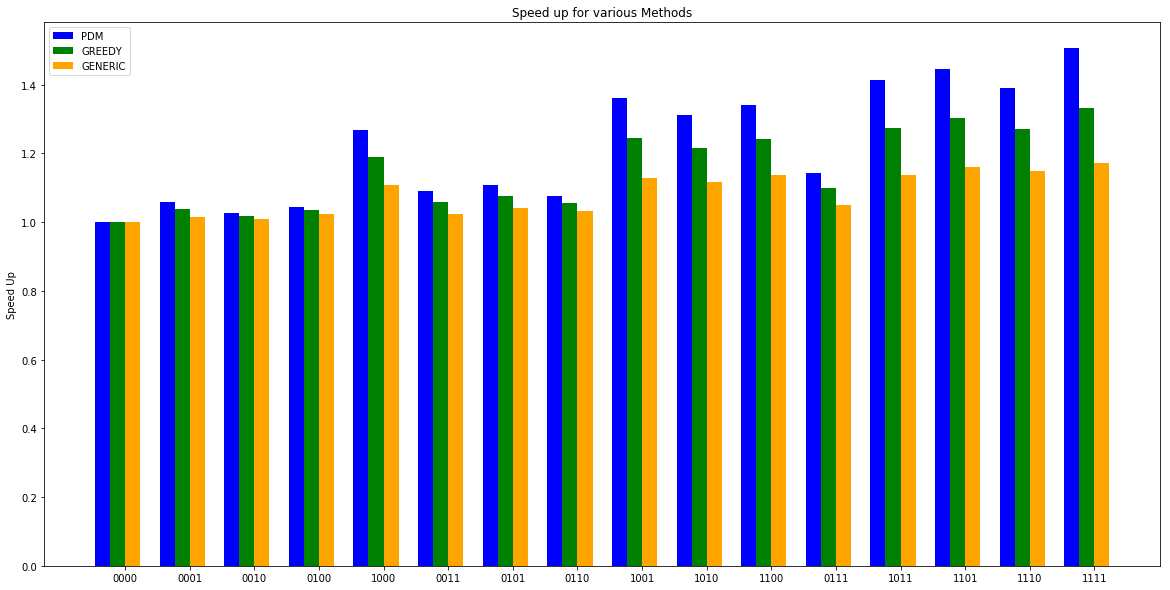

In [99]:
## taken from http://matplotlib.org/examples/api/barchart_demo.html
import matplotlib.pyplot as plt
import numpy as np

numBars = 16
## making the multiplier bigger reduces the size of bar's
index = 1.5*np.arange(numBars) # location of groups
width = 0.35 #width of each bar

#fig, ax = plt.subplots()
#rect1 = ax.bar(index, PDM_OPT, width, color='b')
#rect2 = ax.bar(index+width, GREEDY_OPT, width, color='g')
#rect3 = ax.bar(index+2*width, GENERIC_OPT, width, color='r')
## Adding labels and titles
#ax.set_ylabel('Speed Up')
#ax.set_title('Speed up for various Methods')
#ax.set_xticks(index+1.5*width)
#ax.set_xticklabels(('0000', '0001', '0010', '0011',\
#                    '0100', '0101', '0110', '0111',\
#                    '1000', '1001', '1010', '1011',\
#                    '1100', '1101', '1110', '1111'))
#ax.legend((rect1[0], rect2[0], rect3[0]), ('PDM', 'GREEDY', 'GENERIC'))

plt.figure(figsize=(20,10))
rect1 = plt.bar(index, PDM_OPT, width, color='b')
rect2 = plt.bar(index+width, GREEDY_OPT, width, color='g')
rect3 = plt.bar(index+2*width, GENERIC_OPT, width, color='orange')

tickLabel = (('0000', '0001', '0010', '0100', '1000',\
            '0011', '0101', '0110', '1001', '1010', '1100',\
            '0111', '1011', '1101', '1110',\
            '1111'))

## Adding labels and titles
plt.ylabel('Speed Up')
plt.title('Speed up for various Methods')
plt.xticks(index+1.5*width, tickLabel)

plt.legend((rect1[0], rect2[0], rect3[0]), ('PDM', 'GREEDY', 'GENERIC'))

plt.show()